# CICS 397A - FINAL PROJECT

In [212]:
# Loading the Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import scipy.stats as st
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [213]:
# Loading the Dataset

df = pd.read_csv("social_capital_county.csv") 

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3089 entries, 0 to 3088
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   county                        3089 non-null   int64  
 1   county_name                   3089 non-null   object 
 2   num_below_p50                 3087 non-null   float64
 3   pop2018                       2983 non-null   float64
 4   ec_county                     3018 non-null   float64
 5   ec_se_county                  3018 non-null   float64
 6   child_ec_county               2729 non-null   float64
 7   child_ec_se_county            2729 non-null   float64
 8   ec_grp_mem_county             3012 non-null   float64
 9   ec_high_county                3018 non-null   float64
 10  ec_high_se_county             3018 non-null   float64
 11  child_high_ec_county          2729 non-null   float64
 12  child_high_ec_se_county       2729 non-null   float64
 13  ec_

In [196]:
# Dropping NaN values

df.dropna(inplace = True) 

In [197]:
df.head(15)

,county,county_name,num_below_p50,pop2018,ec_county,ec_se_county,child_ec_county,child_ec_se_county,ec_grp_mem_county,ec_high_county,...,child_exposure_county,child_high_exposure_county,bias_grp_mem_county,bias_grp_mem_high_county,child_bias_county,child_high_bias_county,clustering_county,support_ratio_county,volunteering_rate_county,civic_organizations_county
0,1001,"Autauga, Alabama",5922.3921,55200.0,0.72077,0.00831,1.11754,0.02467,0.77223,1.21372,...,1.14816,1.19944,0.05526,-0.22748,0.02668,-0.08229,0.10347,0.98275,0.04355,0.01518
1,1003,"Baldwin, Alabama",15458.3960,208107.0,0.74313,0.00661,0.83064,0.01629,0.76215,1.28302,...,0.84588,1.00797,0.02950,-0.21519,0.01802,-0.05241,0.09624,0.98684,0.06117,0.01526
2,1005,"Barbour, Alabama",4863.9736,25782.0,0.41366,0.00978,0.58541,0.02707,0.35927,0.91897,...,0.63306,0.71967,0.13457,-0.34086,0.07528,-0.19714,0.14911,0.99911,0.02093,0.01474
3,1007,"Bibb, Alabama",3061.4934,22527.0,0.63152,0.01175,0.72265,0.03027,0.68094,1.06378,...,0.71433,0.72395,0.04108,-0.27727,-0.01165,-0.15993,0.14252,0.99716,0.05294,0.01439
4,1009,"Blount, Alabama",6740.9116,57645.0,0.72562,0.00985,0.76096,0.02466,0.79584,1.10569,...,0.74821,0.79375,0.00217,-0.24946,-0.01704,-0.08745,0.11243,0.99069,0.05704,0.01724
6,1013,"Butler, Alabama",4092.7781,20025.0,0.46026,0.01039,0.63507,0.03159,0.43619,0.93106,...,0.59068,0.71077,0.09278,-0.31730,-0.07516,-0.12359,0.16094,1.00000,0.03807,0.01286
7,1015,"Calhoun, Alabama",15036.1470,115098.0,0.60189,0.00711,0.80398,0.01891,0.63921,1.04627,...,0.79993,0.89271,0.05719,-0.23771,-0.00507,-0.10307,0.11236,0.99701,0.05313,0.01739
8,1017,"Chambers, Alabama",5885.4712,33826.0,0.49761,0.00869,0.62215,0.02561,0.54166,0.91306,...,0.60910,0.68218,0.11264,-0.23977,-0.02143,-0.12734,0.13574,0.99759,0.02566,0.01098
9,1019,"Cherokee, Alabama",3303.9607,25853.0,0.60461,0.01188,0.61975,0.03417,0.67164,0.94985,...,0.60974,0.65038,0.02300,-0.25110,-0.01641,-0.09970,0.12273,0.99697,0.04666,0.01796
10,1021,"Chilton, Alabama",5808.7944,43930.0,0.63505,0.00992,0.69859,0.02589,0.65769,1.04907,...,0.68161,0.69678,0.03350,-0.29148,-0.02491,-0.16645,0.11835,0.99571,0.04340,0.01515


In [198]:
# Splitting column 'county_name' into 'countyName' and 'state_name' columns

df[['countyName','state_name']] = df.county_name.str.split(", ", expand = True)

In [199]:
df.head()

,county,county_name,num_below_p50,pop2018,ec_county,ec_se_county,child_ec_county,child_ec_se_county,ec_grp_mem_county,ec_high_county,...,bias_grp_mem_county,bias_grp_mem_high_county,child_bias_county,child_high_bias_county,clustering_county,support_ratio_county,volunteering_rate_county,civic_organizations_county,countyName,state_name
0,1001,"Autauga, Alabama",5922.3921,55200.0,0.72077,0.00831,1.11754,0.02467,0.77223,1.21372,...,0.05526,-0.22748,0.02668,-0.08229,0.10347,0.98275,0.04355,0.01518,Autauga,Alabama
1,1003,"Baldwin, Alabama",15458.3960,208107.0,0.74313,0.00661,0.83064,0.01629,0.76215,1.28302,...,0.02950,-0.21519,0.01802,-0.05241,0.09624,0.98684,0.06117,0.01526,Baldwin,Alabama
2,1005,"Barbour, Alabama",4863.9736,25782.0,0.41366,0.00978,0.58541,0.02707,0.35927,0.91897,...,0.13457,-0.34086,0.07528,-0.19714,0.14911,0.99911,0.02093,0.01474,Barbour,Alabama
3,1007,"Bibb, Alabama",3061.4934,22527.0,0.63152,0.01175,0.72265,0.03027,0.68094,1.06378,...,0.04108,-0.27727,-0.01165,-0.15993,0.14252,0.99716,0.05294,0.01439,Bibb,Alabama
4,1009,"Blount, Alabama",6740.9116,57645.0,0.72562,0.00985,0.76096,0.02466,0.79584,1.10569,...,0.00217,-0.24946,-0.01704,-0.08745,0.11243,0.99069,0.05704,0.01724,Blount,Alabama


In [200]:
# Subsetting the columns I will be using for my analysis

df_subset = df[["county_name", "countyName", "state_name", "num_below_p50", "pop2018", "ec_county", "child_ec_county", "ec_high_county", "clustering_county", "support_ratio_county", "volunteering_rate_county", "civic_organizations_county"]]

df_subset.head(15)

,county_name,countyName,state_name,num_below_p50,pop2018,ec_county,child_ec_county,ec_high_county,clustering_county,support_ratio_county,volunteering_rate_county,civic_organizations_county
0,"Autauga, Alabama",Autauga,Alabama,5922.3921,55200.0,0.72077,1.11754,1.21372,0.10347,0.98275,0.04355,0.01518
1,"Baldwin, Alabama",Baldwin,Alabama,15458.3960,208107.0,0.74313,0.83064,1.28302,0.09624,0.98684,0.06117,0.01526
2,"Barbour, Alabama",Barbour,Alabama,4863.9736,25782.0,0.41366,0.58541,0.91897,0.14911,0.99911,0.02093,0.01474
3,"Bibb, Alabama",Bibb,Alabama,3061.4934,22527.0,0.63152,0.72265,1.06378,0.14252,0.99716,0.05294,0.01439
4,"Blount, Alabama",Blount,Alabama,6740.9116,57645.0,0.72562,0.76096,1.10569,0.11243,0.99069,0.05704,0.01724
6,"Butler, Alabama",Butler,Alabama,4092.7781,20025.0,0.46026,0.63507,0.93106,0.16094,1.00000,0.03807,0.01286
7,"Calhoun, Alabama",Calhoun,Alabama,15036.1470,115098.0,0.60189,0.80398,1.04627,0.11236,0.99701,0.05313,0.01739
8,"Chambers, Alabama",Chambers,Alabama,5885.4712,33826.0,0.49761,0.62215,0.91306,0.13574,0.99759,0.02566,0.01098
9,"Cherokee, Alabama",Cherokee,Alabama,3303.9607,25853.0,0.60461,0.61975,0.94985,0.12273,0.99697,0.04666,0.01796
10,"Chilton, Alabama",Chilton,Alabama,5808.7944,43930.0,0.63505,0.69859,1.04907,0.11835,0.99571,0.04340,0.01515


In [201]:
# Filtering the rows based on the 3 states

states = ["Massachusetts", "Oklahoma", "Washington"]

df_states = df_subset[df_subset['state_name'].isin(states)]

df_states.head(20)
#df_states.tail(20)

,county_name,countyName,state_name,num_below_p50,pop2018,ec_county,child_ec_county,ec_high_county,clustering_county,support_ratio_county,volunteering_rate_county,civic_organizations_county
1212,"Barnstable, Massachusetts",Barnstable,Massachusetts,16130.88300,213690.0,1.06256,1.05355,1.55960,0.10676,0.98933,0.08102,0.03134
1213,"Berkshire, Massachusetts",Berkshire,Massachusetts,11015.84000,127328.0,0.89659,0.93656,1.36520,0.11982,0.99804,0.07421,0.02718
1214,"Bristol, Massachusetts",Bristol,Massachusetts,43015.09800,558905.0,0.80197,0.89408,1.45710,0.09634,0.98511,0.06181,0.01269
1215,"Dukes, Massachusetts",Dukes,Massachusetts,1091.96110,17313.0,0.91086,1.11642,1.55601,0.13065,0.99748,0.10104,0.04181
1216,"Essex, Massachusetts",Essex,Massachusetts,55750.39800,781024.0,0.80095,1.10448,1.58734,0.09402,0.97745,0.05528,0.01454
1217,"Franklin, Massachusetts",Franklin,Massachusetts,6220.01950,70935.0,1.07030,0.90452,1.47007,0.10738,0.98742,0.11804,0.02446
1218,"Hampden, Massachusetts",Hampden,Massachusetts,44490.30500,469116.0,0.62908,0.79861,1.41018,0.09206,0.98961,0.05608,0.01145
1219,"Hampshire, Massachusetts",Hampshire,Massachusetts,8437.81740,161159.0,1.13619,1.22282,1.58252,0.09932,0.96188,0.14134,0.03068
1220,"Middlesex, Massachusetts",Middlesex,Massachusetts,81451.51600,1595192.0,1.01036,1.16010,1.64717,0.09736,0.95606,0.07706,0.01680
1221,"Nantucket, Massachusetts",Nantucket,Massachusetts,507.23679,11101.0,0.69372,1.03628,1.47080,0.12029,0.99728,0.03474,0.03120


## VISUALIZATION TASKS

[Text(0.5, 1.0, 'Population by State')]

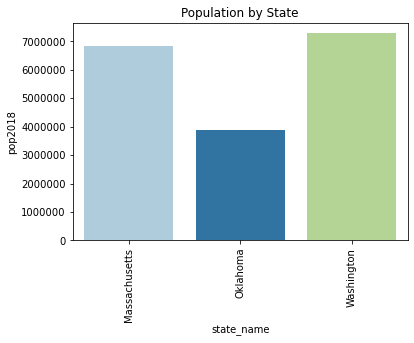

In [202]:
# Population by State

df_temp = df_states

dfPop = df_temp.groupby(['state_name']).sum({'pop2018': 'sum'})

plot = sns.barplot(data = dfPop,  x = dfPop.index , y = dfPop['pop2018'], palette = 'Paired')
plot.ticklabel_format(axis = 'y', style = 'plain')
plot.tick_params(axis = 'x', labelrotation = 90)
plot.set(title = "Population by State")

[Text(0.5, 1.0, 'Count of Children with Low Parental Household Income')]

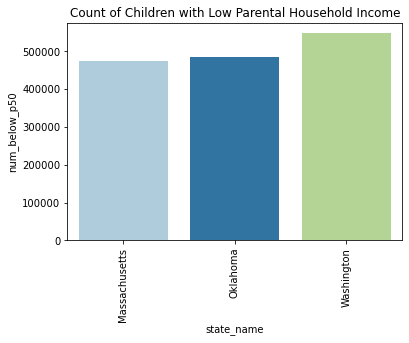

In [203]:
# Number of Children with Low Parental Household Income

dfChildPop = df_temp.groupby(['state_name']).sum({'num_below_p50': 'sum'})
                                           
plot = sns.barplot(data = dfChildPop,  x = dfChildPop.index , y = dfChildPop['num_below_p50'], palette = 'Paired')
plot.ticklabel_format(axis = 'y', style = 'plain')
plot.tick_params(axis = 'x', labelrotation = 90)
plot.set(title = "Count of Children with Low Parental Household Income")

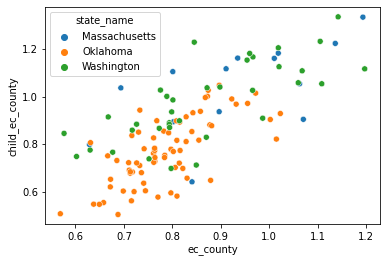

In [204]:
# Comparison of two Connectedness Variables relative to the States

plot = sns.scatterplot(data = df_temp, x = "ec_county", y = "child_ec_county", hue = "state_name")

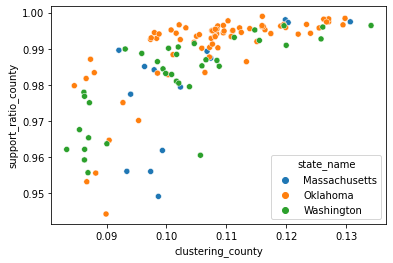

In [205]:
# Comparison of two Cohesiveness variables relative to the States

plot = sns.scatterplot(data = df_temp, x = "clustering_county", y = "support_ratio_county", hue = "state_name")

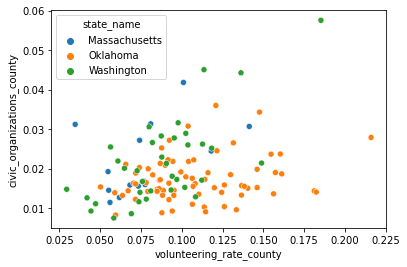

In [206]:
# Comparison of two Civic Engagement variables relative to the States

plot = sns.scatterplot(data = df_temp, x = "volunteering_rate_county", y = "civic_organizations_county", hue = "state_name")

### ASSOCIATION TASK

<AxesSubplot:>

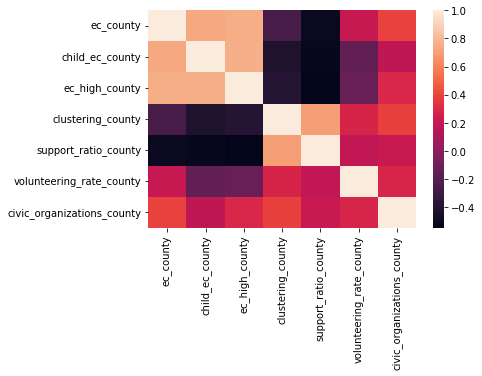

In [207]:
# Correlation Matrix between all the Social Capital Types Variables

df_tempSub = df_temp[["ec_county", "child_ec_county", "ec_high_county", "clustering_county", "support_ratio_county", "volunteering_rate_county", "civic_organizations_county"]]

sns.heatmap(df_tempSub.corr())

## CLUSTERING TASK

In [208]:
# Setting County as Index for Clustering and Classification

df_temp.set_index('county_name', inplace = True)
df_temp.head(20)

,countyName,state_name,num_below_p50,pop2018,ec_county,child_ec_county,ec_high_county,clustering_county,support_ratio_county,volunteering_rate_county,civic_organizations_county
county_name,,,,,,,,,,,
"Barnstable, Massachusetts",Barnstable,Massachusetts,16130.88300,213690.0,1.06256,1.05355,1.55960,0.10676,0.98933,0.08102,0.03134
"Berkshire, Massachusetts",Berkshire,Massachusetts,11015.84000,127328.0,0.89659,0.93656,1.36520,0.11982,0.99804,0.07421,0.02718
"Bristol, Massachusetts",Bristol,Massachusetts,43015.09800,558905.0,0.80197,0.89408,1.45710,0.09634,0.98511,0.06181,0.01269
"Dukes, Massachusetts",Dukes,Massachusetts,1091.96110,17313.0,0.91086,1.11642,1.55601,0.13065,0.99748,0.10104,0.04181
"Essex, Massachusetts",Essex,Massachusetts,55750.39800,781024.0,0.80095,1.10448,1.58734,0.09402,0.97745,0.05528,0.01454
"Franklin, Massachusetts",Franklin,Massachusetts,6220.01950,70935.0,1.07030,0.90452,1.47007,0.10738,0.98742,0.11804,0.02446
"Hampden, Massachusetts",Hampden,Massachusetts,44490.30500,469116.0,0.62908,0.79861,1.41018,0.09206,0.98961,0.05608,0.01145
"Hampshire, Massachusetts",Hampshire,Massachusetts,8437.81740,161159.0,1.13619,1.22282,1.58252,0.09932,0.96188,0.14134,0.03068
"Middlesex, Massachusetts",Middlesex,Massachusetts,81451.51600,1595192.0,1.01036,1.16010,1.64717,0.09736,0.95606,0.07706,0.01680


In [211]:
# Unsuccessful Task of KMeans Clustering

clust_columns =["ec_county", "child_ec_county", "ec_high_county", "clustering_county", "support_ratio_county", "volunteering_rate_county", "civic_organizations_county"]
num_clusts = 5
linkage_type = "ward"
df_cluster = df_temp[clust_columns].dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

clustering = KMeans(n_clusters = 10, n_init = 10, max_iter = 100, random_state = 0).fit(scaled_data)

df_cluster["cluster"] = clustering.labels_
df_temp["cluster"] = df_cluster["cluster"]


# Tried fixing it but was unable to

/var/folders/9m/kdzdjkx961l2h3vyjm8tfhzr0000gn/T/ipykernel_50967/371591705.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["cluster"] = df_cluster["cluster"]


In [209]:
# Successful Task of Agglomerative Clustering


clust_columns =["ec_county", "child_ec_county", "ec_high_county", "clustering_county", "support_ratio_county", "volunteering_rate_county", "civic_organizations_county"]
num_clusts = 5
linkage_type = "ward"
df_cluster = df_temp[clust_columns].dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)
agglom = AgglomerativeClustering(n_clusters = num_clusts, linkage = linkage_type).fit(scaled_data)
df_cluster["label"] = agglom.labels_

In [210]:
# Printing out the Clusters for Analyzing

cluster_county = {}
for index, row in df_cluster.reset_index().iterrows():
    clust = row["label"]
    cluster_county.setdefault(clust, []).append(row)
    
for cluster, rows in cluster_county.items():
    rows_tuples = [ tuple(row) for row in rows ]
    for row in sorted(rows_tuples):
        print(row[:7])
    print("\n")

('Barnstable, Massachusetts', 1.06256, 1.05355, 1.5596, 0.10676, 0.98932999, 0.081019998)
('Benton, Washington', 0.84521002, 1.22795, 1.35613, 0.086230002, 0.97798002, 0.078270003)
('Canadian, Oklahoma', 0.8969, 1.04733, 1.38144, 0.086709999, 0.95322001, 0.087849997)
('Clark, Washington', 0.95416999, 1.15286, 1.36939, 0.085490003, 0.96763003, 0.10849)
('Cleveland, Oklahoma', 0.87399, 1.02633, 1.3803999, 0.088200003, 0.95561999, 0.095310003)
('Creek, Oklahoma', 0.78388, 0.74427003, 1.23199, 0.095349997, 0.97016001, 0.12613)
('Essex, Massachusetts', 0.80094999, 1.10448, 1.58734, 0.094020002, 0.97745001, 0.05528)
('Franklin, Massachusetts', 1.0703, 0.90451998, 1.47007, 0.10738, 0.98742002, 0.11804)
('Hampshire, Massachusetts', 1.1361901, 1.22282, 1.58252, 0.099320002, 0.96188003, 0.14134)
('Island, Washington', 1.10506, 1.23142, 1.40894, 0.090060003, 0.96372998, 0.087800004)
('King, Washington', 1.05981, 1.05786, 1.59407, 0.086910002, 0.95573002, 0.081029996)
('Kitsap, Washington', 1.0187

### CLASSIFICATION TASK

In [216]:
# Setting up for Classification

class_label = "Population" 

def popLabels(x):
    if (x > 1500000):
        return "Big Sized County"
    elif (x < 1500000 and x > 250000):
        return "Medium Sized County"
    else:
        return "Small Sized County"
    
df.dropna(inplace = True)
df[class_label] = df['pop2018'].apply(popLabels)  

In [219]:
# Splitting into Training and Testing Sets

y = df[class_label]
x = df.drop(columns = ["pop2018", "county_name", class_label])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [220]:
# Classification Task


from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))

from sklearn import metrics
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)

print(acc)

f1_weighted = metrics.f1_score(y_test, y_pred, average = "weighted")
print(f1_weighted)

0.9815837937384899
0.9815837937384899
0.9816765885762416


In [221]:
from sklearn import metrics
scores = cross_val_score(clf, x, y, cv = 5, scoring = 'f1_weighted')

print(scores)

[0.92706637 0.97423981 0.97105889 0.98929133 0.9704797 ]


# THANK YOU FOR A GREAT SEM! :)